# Example on clustering images
The CIFAR-10 dataset (*Learning Multiple Layers of Features from Tiny Images*, Alex Krizhevsky, 2009.) used in this example can be downloaded at [http://www.cs.toronto.edu/~kriz/cifar.html](http://www.cs.toronto.edu/~kriz/cifar.html).

- **data**: a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
- **labels**: a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import pickle

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d

In [4]:
data_file = '/Users/flint/Data/cifar-10/data_batch_1'
data = unpickle(data_file)
label_names = unpickle('/Users/flint/Data/cifar-10/batches.meta')

In [5]:
images = data[b'data']
labels = data[b'labels']
label_names = [x.decode("utf-8") for x in label_names[b'label_names']]

## Display

In [6]:
import matplotlib.pyplot as plt

In [39]:
def to_tensor(a):
    red = a[:1024].reshape(32, -1)
    green = a[1024:2048].reshape(32, -1)
    blue = a[2048:].reshape(32, -1)
    return np.array([red.T, green.T, blue.T]).T

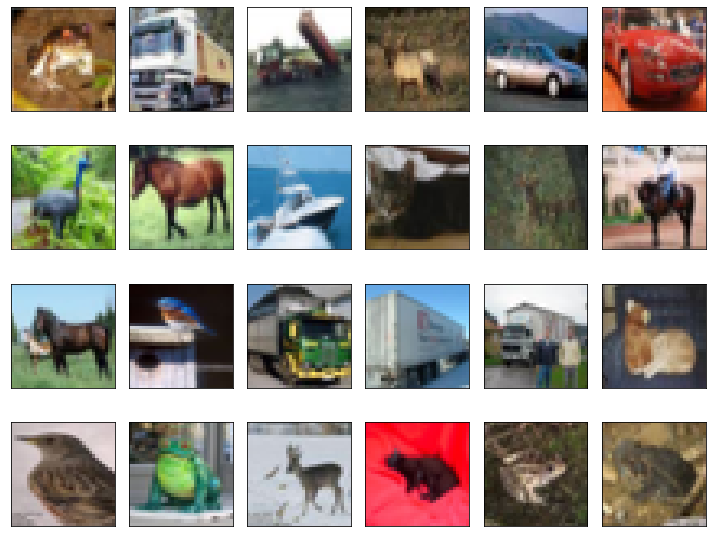

In [13]:
page, rows = 6, 4
fig, ax = plt.subplots(figsize=(10, 8), ncols=page, nrows=rows)
for i in range(rows):
    for j, im in enumerate(images[i*page:i*page+page]):
        imt = to_tensor(im)
        ax[i,j].imshow(imt)
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

## Ground truth

In [14]:
samples = 1000
y_true = labels[:samples]

In [16]:
[label_names[i] for i in y_true[:10]]

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat']

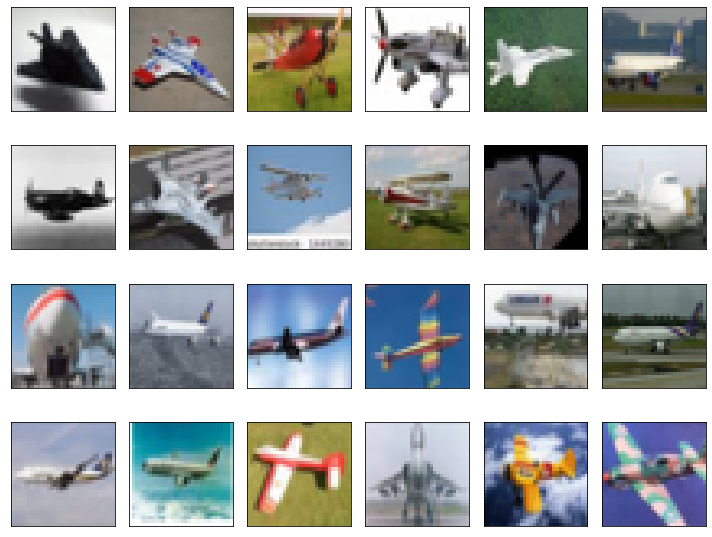

In [17]:
label = 0
label_images = [images[i] for i, x in enumerate(y_true) if x == label]
page, rows = 6, 4
fig, ax = plt.subplots(figsize=(10, 8), ncols=page, nrows=rows)
for i in range(rows):
    for j, im in enumerate(label_images[i*page:i*page+page]):
        imt = to_tensor(im)
        ax[i,j].imshow(imt)
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

## Clustering

In [28]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [29]:
k = len(label_names)
model = KMeans(n_clusters=k)

In [40]:
assignment = model.fit_predict(images[:samples])

In [31]:
clusters = defaultdict(list)
for i, c in enumerate(assignment):
    clusters[c].append(images[i])

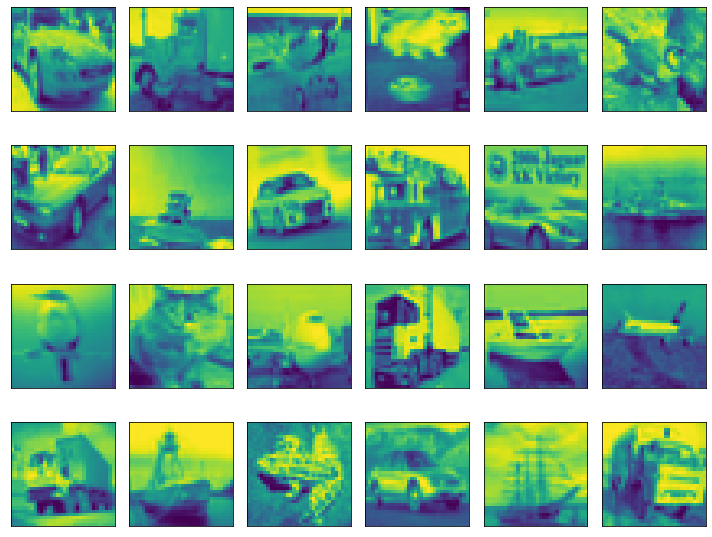

In [38]:
cluster = 1
cluster_images = clusters[cluster]
page, rows = 6, 4
fig, ax = plt.subplots(figsize=(10, 8), ncols=page, nrows=rows)
for i in range(rows):
    for j, im in enumerate(cluster_images[i*page:i*page+page]):
        imt = to_tensor(im)
        ax[i,j].imshow(imt)
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [26]:
model.predict(np.array([images[900]]))

array([3], dtype=int32)

In [27]:
images[:samples].shape

(1000, 3072)